# DPCCA analysis with time lags

For dpcca analysis with time lags we compare original data array and shifted data array by $\tau$.

We have global restrictions which apply to the entire data array and local restrictions which apply to the data in current time window.

$L$-length of the current data window.

$N$-length of input data array.

$t$-window start index in global data array.

$i$-current index of current element in data array.

$$
\text{if }\tau\geq 0:\\
$$

# Restrictions for array with positive time lags
$$
\begin{cases}
i\geq t\\
i<\text{min}(t+L;N-\tau)
\end{cases}
$$

# Extra limits for current window
$$
\begin{cases}
i< t+L-\tau\\
i\in[t;\text{min}(t+L-\tau;N-\tau)]
\end{cases}
$$

$$
\text{if }\tau< 0:\\
$$

# Restrictions for array with negative time lags
$$
\begin{cases}
i\geq t\\
i\geq-\tau\\
i\geq \text{max}(t,-\tau)\\
i<t+L\\
i\geq t-\tau
\end{cases}
$$

# Extra limits for current window
$$
i\in[\text{max}(t;t-\tau);t+L]
$$


# Relations between local and global indecies in data arrays
$$
\text{local index of element in data window for array without lag}=i-t
$$

For each window and lag $\tau$ only valid index pairs $(i,i+\tau)$ and $(i,i-\tau) are considered for which both values $x[i]$ and $y[i+\tau]$ and $x[i]$ and $y[i-\tau]$ are defined.

Also we have indecies of position of current value in current time window:
$$
\begin{cases}
\text{if }\tau\geq 0:\\
\text{shift first signal}=0\\
\text{shift second signal}=\tau\\
\end{cases}
$$

Example:
$$
\begin{cases}
\tau=2\\
x[i]=0\\
x[i+\tau]=2
\end{cases}
$$

$$
\begin{cases}
\text{if }\tau< 0:\\
\text{shift first signal}=-\tau\\
\text{shift second signal}=0\\
\end{cases}
$$

Example:
$$
\begin{cases}
\tau=-2\\
x[i]=2\\
x[i-\tau]=0
\end{cases}
$$



In [ ]:
import numpy as np
from StatTools.analysis.dpcca import tdc_dpcca_worker
import matplotlib.pyplot as plt

In [40]:
length = 59
impulse_func=np.zeros(length)
impulse_index=25
impulse_func[impulse_index]=1
time_lag= 4
lag_range=np.arange(-5,+6)
original_signal=impulse_func[:-time_lag]
lag_signal=impulse_func[time_lag:]
signals = np.vstack([original_signal, lag_signal])
s = [35, 40, 51]

p,r,f=tdc_dpcca_worker(
    s=s,
    arr=signals,
    step=1,
    pd=1,
    time_delays=None,
    max_time_delay=5,
    n_integral=0,
)

for s_idx in range(len(s)):
    correlation = r[:,s_idx,0,1]
    max_lag_idx = np.argmax(correlation)
    print("estimated lag", lag_range[max_lag_idx])
print("correlation",correlation)
print("original signal", original_signal)
print("shifted signal", lag_signal)
print("lag_range", lag_range)

estimated lag 4
estimated lag 4
estimated lag 4
correlation [-8.99785623e-01 -9.15723076e-01 -9.29935621e-01 -9.42733290e-01
 -9.54358495e-01 -2.00147856e-02 -9.72889728e-01 -9.81409527e-01
 -9.90693665e-01  4.50407978e+01 -1.01225883e+00]
original signal [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
shifted signal [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]
lag_range [-5 -4 -3 -2 -1  0  1  2  3  4  5]


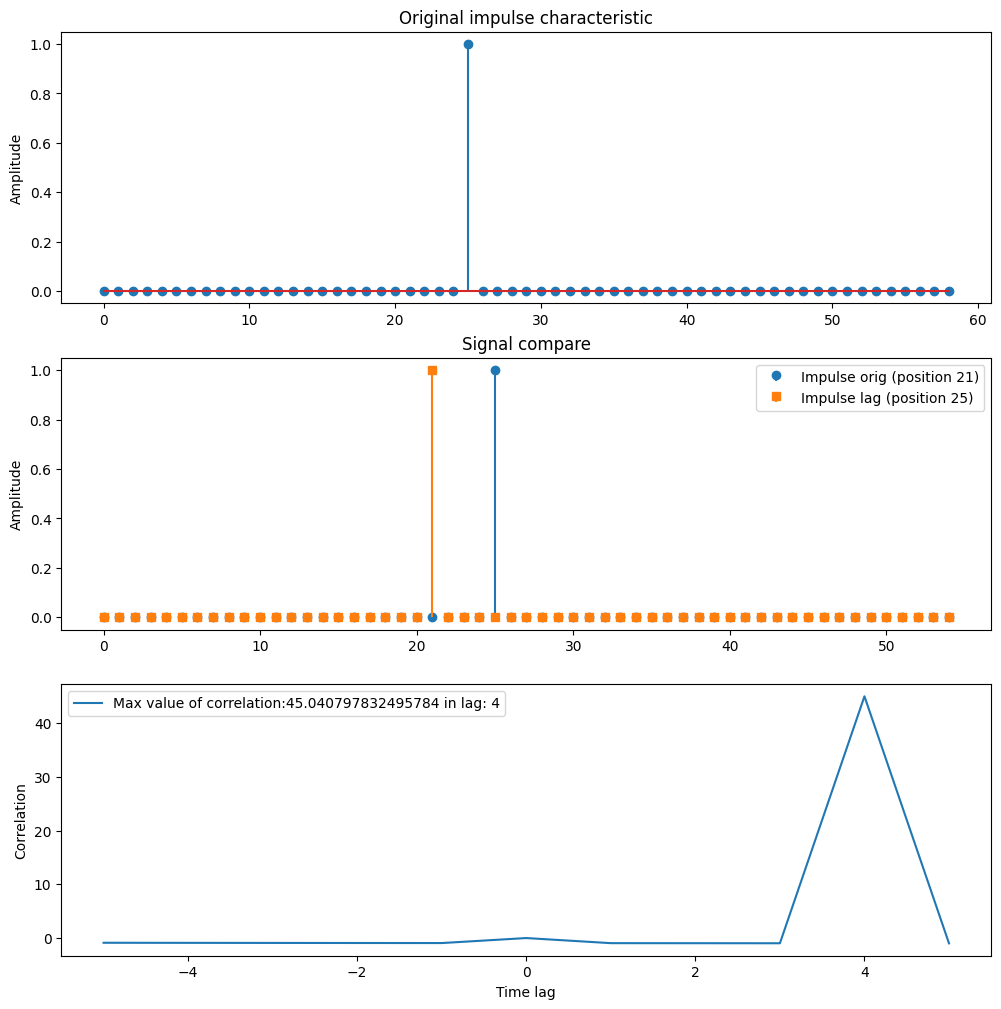

In [43]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.stem(np.arange(length), impulse_func)
plt.title("Original impulse characteristic")
plt.ylabel("Amplitude")

plt.subplot(3,1,2)
x_original=np.arange(len(original_signal))
x_lag=np.arange(len(lag_signal))

plt.stem(x_original, original_signal,linefmt='C0-', markerfmt='C0o', basefmt=" ", label=f'Impulse orig (position {impulse_index-time_lag})')
plt.stem(x_lag, lag_signal,linefmt='C1-', markerfmt='C1s', basefmt=" ", label=f'Impulse lag (position {impulse_index})')
plt.title("Signal compare")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3,1,3)
plt.plot(lag_range,correlation, label=f"Max value of correlation:{np.max(correlation)} in lag: {lag_range[max_lag_idx]}")
plt.xlabel("Time lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()


In [38]:
length = 67
impulse_func=np.zeros(length)
impulse_index=25
impulse_func[impulse_index]=1
time_lag= 4
lag_range=np.arange(-5,+6)
original_signal=impulse_func[:-time_lag]
lag_signal=impulse_func[time_lag:]
signals = np.vstack([lag_signal, original_signal])
s = [35, 40, 51]

p,r,f=tdc_dpcca_worker(
    s=s,
    arr=signals,
    step=1,
    pd=1,
    time_delays=None,
    max_time_delay=5,
    n_integral=0,
)


for s_idx in range(len(s)):
    correlation = r[:,s_idx,0,1]
    max_lag_idx = np.argmax(correlation)
    print("estimated lag", lag_range[max_lag_idx])
print("correlation",correlation)
print("original signal", original_signal)
print("shifted signal", lag_signal)
print("lag_range", lag_range)

estimated lag -4
estimated lag -4
estimated lag -4
correlation [-1.01225883e+00  4.50407978e+01 -9.90693665e-01 -9.81409527e-01
 -9.72889728e-01 -2.00147856e-02 -9.54358495e-01 -9.42733290e-01
 -9.29935621e-01 -9.15723076e-01 -8.99785623e-01]
original signal [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shifted signal [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
lag_range [-5 -4 -3 -2 -1  0  1  2  3  4  5]


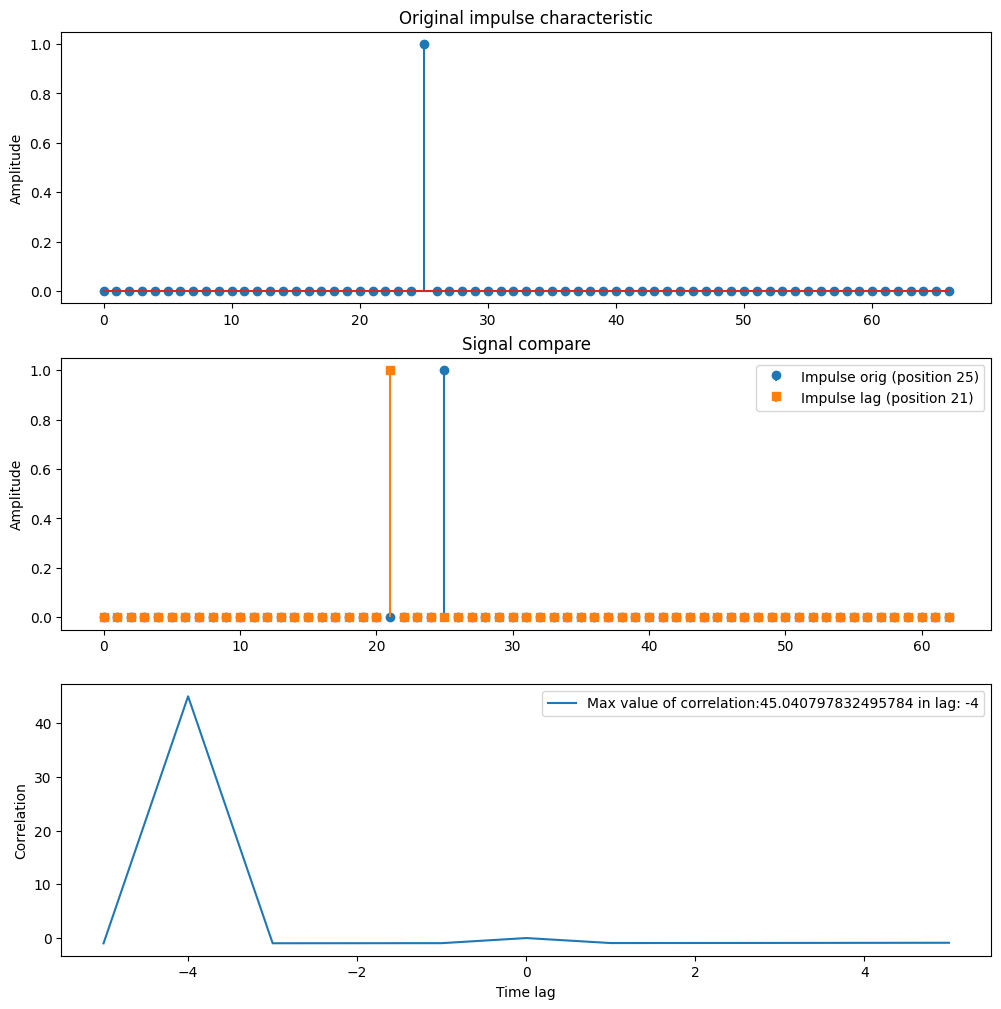

In [39]:
plt.figure(figsize=(12,12))
plt.subplot(3,1,1)
plt.stem(np.arange(length), impulse_func)
plt.title("Original impulse characteristic")
plt.ylabel("Amplitude")

plt.subplot(3,1,2)
x_original=np.arange(len(original_signal))
x_lag=np.arange(len(lag_signal))

plt.stem(x_original, original_signal,linefmt='C0-', markerfmt='C0o', basefmt=" ", label=f'Impulse orig (position {impulse_index})')
plt.stem(x_lag, lag_signal,linefmt='C1-', markerfmt='C1s', basefmt=" ", label=f'Impulse lag (position {impulse_index - time_lag})')
plt.title("Signal compare")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(3,1,3)
plt.plot(lag_range,correlation, label=f"Max value of correlation:{np.max(correlation)} in lag: {lag_range[max_lag_idx]}")
plt.xlabel("Time lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()


Max correlation locates in time lag that equals adjusted time lag. Therefore estimated time lag equals adjusted time lag.